In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima

In [2]:
data = pd.read_csv("../../datas/IEA Global EV Data 2024 new.csv", header = 0, delimiter = ",")
data

,region,category,parameter,mode,powertrain,year,unit,value,percentage
0,Austria,Historical,EV stock,Cars,BEV,2010,Vehicles,350,"35000,00%"
1,Austria,Historical,EV stock share,Cars,EV,2010,percent,789.999.961.853,"78999996185300,00%"
2,Belgium,Historical,EV stock,Buses,BEV,2010,Vehicles,3,"300,00%"
3,Belgium,Historical,EV sales,Vans,BEV,2010,Vehicles,7,"700,00%"
4,Belgium,Historical,EV stock,Vans,BEV,2010,Vehicles,62,"6200,00%"
...,...,...,...,...,...,...,...,...,...
12649,World,Projection-STEPS,EV sales share,Cars,EV,2035,percent,55,"5500,00%"
12650,World,Projection-STEPS,EV stock share,Cars,EV,2035,percent,31,"3100,00%"
12651,World,Projection-APS,EV charging points,EV,Publicly available fast,2035,charging points,9400000,"940000000,00%"
12652,World,Projection-APS,EV charging points,EV,Publicly available slow,2035,charging points,15000000,"1500000000,00%"


In [3]:
data['percentage'] = data['percentage'].str.replace(',', '').str.replace('%', '').astype(float)
data['value'] = data['value'].str.replace(',', '').str.replace('.', '', regex=False)
data['value'] = pd.to_numeric(data['value'], errors='coerce')

In [4]:
data.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
percentage    0
dtype: int64

In [5]:
data_process = data[["year", "value"]]
data_process

,year,value
0,2010,3.500000e+02
1,2010,7.900000e+11
2,2010,3.000000e+00
3,2010,7.000000e+00
4,2010,6.200000e+01
...,...,...
12649,2035,5.500000e+01
12650,2035,3.100000e+01
12651,2035,9.400000e+06
12652,2035,1.500000e+07


In [87]:
data_process["year"].value_counts()

year
2023    1348
2021    1342
2022    1336
2020    1282
2019     797
2018     761
2017     720
2016     668
2015     621
2030     550
2025     549
2035     549
2014     515
2013     481
2012     442
2011     390
2010     303
Name: count, dtype: int64

In [6]:
data_group = data_process.groupby("year").sum()
data_group

,value
year,
2010,1.109653e+16
2011,1.203114e+16
2012,1.902760e+16
2013,2.240774e+16
2014,3.036949e+16
2015,3.043629e+16
2016,3.902947e+16
2017,4.648228e+16
2018,5.332812e+16


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


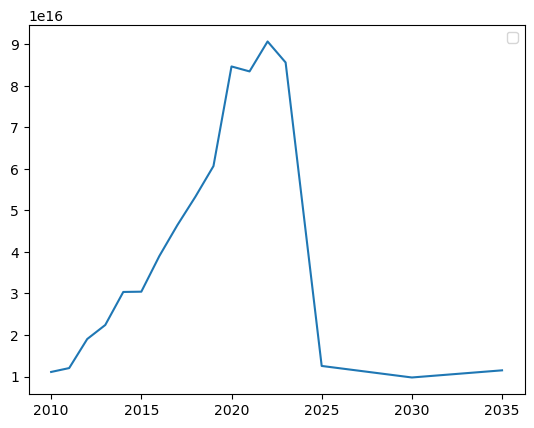

In [7]:
plt.plot(data_group["value"])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


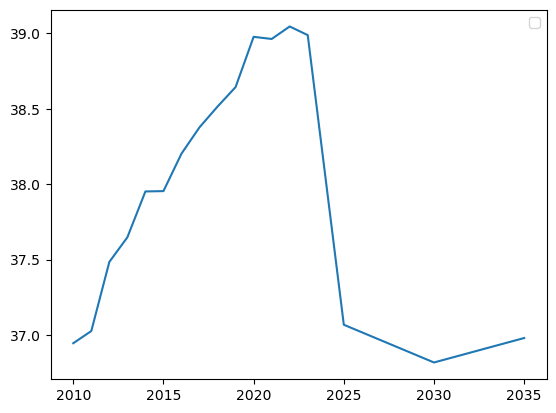

(-3.0631320388842456,
 0.029404643268910752,
 5,
 11,
 {'1%': -4.223238279489106,
  '5%': -3.189368925619835,
  '10%': -2.729839421487603},
 17.932352553737427)

In [8]:
data_group["value"] = np.log(data_group["value"])
plt.plot(data_group["value"])
plt.legend()
plt.show()

adfuller(data_group["value"])

In [9]:
train_size = int(len(data_group) * 0.8)
train,test = data_group[:train_size], data_group[train_size:]
# train = data_group[data_group["year"] <= 2024]["value"]
# test = data_group[data_group["year"] > 2024]["value"]

In [75]:
model = ARIMA(train, order = (0, 0, 1))
model_fit = model.fit()

C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


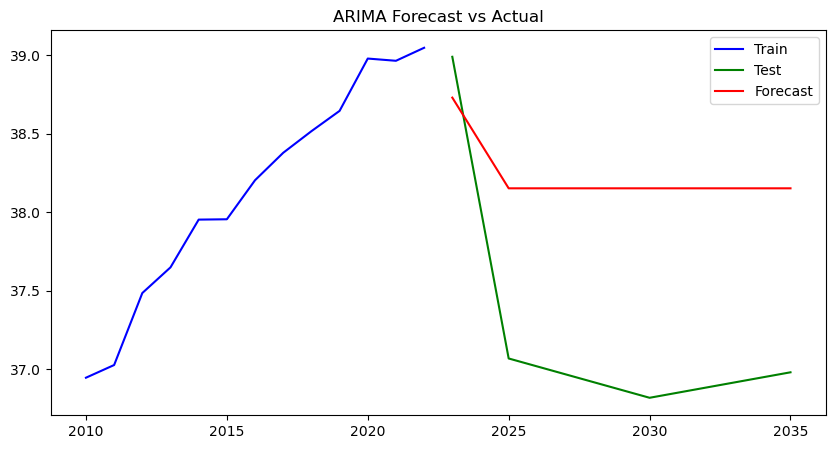

In [76]:
forecast = model_fit.forecast(steps=len(test))
plt.figure(figsize=(10, 5))
plt.plot(data_group.index[:train_size], train, label='Train', color='blue')
plt.plot(data_group.index[train_size:], test, label='Test', color='green')
plt.plot(data_group.index[train_size:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()

In [77]:
mean_absolute_error(test, forecast), mean_absolute_percentage_error(test, forecast), np.sqrt(mean_squared_error(test, forecast))

(0.9622552486126619, 0.02595280873554292, 1.048043916640192)

ARIMA(1, 2, 3): (1.8490461156648959, 0.05000384876205932, 2.109069774054806) <br/>
ARIMA(2, 0, 2): (1.8116643179843024, 0.04896655274580544, 2.0445913456052645) <br/>
ARIMA(2, 0, 0): (1.4915722429127118, 0.04034811050849511, 1.7094252404410897) <br/>
ARIMA(1, 0, 2): (1.3920376082683799, 0.03764225238443543, 1.5847247284184474) <br/>
ARIMA(3, 0, 0): (1.3782497666876008, 0.037288097105754064, 1.5859935622842356) <br/>
ARIMA(0, 0, 2): (1.0064339342265871, 0.027218462779165356, 1.155180230205046) <br/>
ARIMA(0, 0, 1): (0.9622552486126619, 0.02595280873554292, 1.048043916640192) <br/>